# K-Nearest Neighbors Classifier

K-Nearest Neighbors (KNN) is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.

If you have a dataset of points where the class of each point is known, you can take a new point with an unknown class, find it’s nearest neighbors, and classify it.

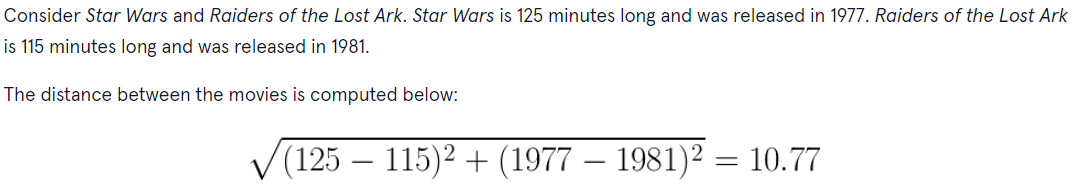

In [ ]:
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):
  a = (movie1[0] - movie2[0]) ** 2
  b = (movie1[1] - movie2[1]) ** 2
  return (a + b) ** 0.5

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))

The three steps of the K-Nearest Neighbor Algorithm:

1. Normalize the data

2. Find the k nearest neighbors

3. Classify the new point based on those neighbors

## 1. Normalising data

For it to work, we need to normalize the data so every value is between 0 and 1

In [ ]:
release_dates = [1897.0, 1998.0, 2000.0, 1948.0, 1962.0, 1950.0, 1975.0, 1960.0, 2017.0, 1937.0, 1968.0, 1996.0, 1944.0, 1891.0, 1995.0, 1948.0, 2011.0, 1965.0, 1891.0, 1978.0]

def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []
  
  for value in lst:
    normalized_num = (value - minimum) / (maximum - minimum)
    normalized.append(normalized_num)
  
  return normalized

print(min_max_normalize(release_dates))

## 2. Finding the Nearest Neighbors



In [ ]:
from movies import movie_dataset, movie_labels, normalize_point

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

"""
Find the distance between each `point` and `unknown` 
Add `[distance_to_point, point]` to `distances`
Sort distances
Find the top 'k' values in distances
"""

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
print("Call Me By Your Name" in movie_dataset)

my_movie = [3500000, 132, 2017]

normalized_my_movie = normalize_point(my_movie)

classify(normalized_my_movie, movie_dataset, movie_labels, 5)

## Training and validation datasets

We need to check that what classifer predicts is actually correct. We do this by checking against a validation set.